In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/drive/MyDrive/voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


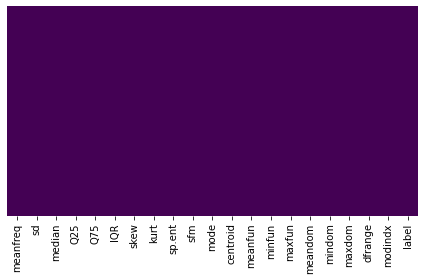

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()
get_heatmap(df)

In [14]:
#Data Preprocessing

from sklearn import preprocessing

#Label Encoding
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

df.label = LE.fit_transform(df.label)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [15]:
#importing standardscaler from scikit - learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
#standandizing the data apart from the class column
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)
#data_scaled =pd.DataFrame(sst.fit_transform(df.drop('Outbreak',axis=1)))
#Adding the class column back to the DataFrame

In [16]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


In [18]:
data_scaled.columns=['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']
data_scaled.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


In [20]:
data_scaled['label'] = df.label
data_scaled

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Class,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,1,1
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,1,1
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,1,1
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,1,1
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0,0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0,0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0,0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0,0


In [21]:
data_scaled = data_scaled[data_scaled['label'].notna()]

In [24]:
x=data_scaled.iloc[:,0:20]
y=data_scaled.iloc[:,20:21]

In [26]:
#splitting the dataset
#splitting the dataset into train&test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [27]:
x_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1457,0.091392,0.401598,-0.094954,-0.009360,0.885863,0.500124,-0.234146,-0.209948,0.116276,-0.146930,0.218768,0.091392,-1.097396,0.540973,0.618983,-0.121892,-0.461523,0.024296,0.032603,-0.507024
1299,-0.013356,0.138772,0.446422,-0.426828,0.069663,0.524148,-0.346961,-0.227810,0.534620,0.361774,0.589444,-0.013356,0.141260,0.602869,0.618983,-0.279330,-0.461523,-0.188736,-0.180497,-0.451847
1238,-0.151956,-0.109758,-0.589225,-0.256119,0.198196,0.400930,-0.419327,-0.239317,0.479696,0.045902,-0.576005,-0.151956,-0.048624,0.533749,0.618983,1.038530,-0.461523,0.057582,0.065900,-0.476234
1002,0.458708,-0.063163,0.447234,0.476374,0.736531,-0.135070,-0.441124,-0.238775,0.373669,-0.678939,0.468794,0.458708,-0.924286,0.526568,0.618983,0.362852,-0.461523,1.628692,1.637508,-0.916835
2082,0.116498,-1.665262,-0.040293,0.631024,-1.102732,-1.327298,-0.025499,-0.175749,-1.734148,-1.220875,0.086361,0.116498,1.209421,-0.699599,-0.783044,-0.365189,1.760410,0.394882,0.363351,-0.501522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.421266,-1.435151,0.281944,0.606693,-0.766158,-1.113644,-0.071108,-0.175990,-1.227254,-1.255665,0.480112,0.421266,0.493899,0.533749,0.672624,0.375448,-0.461523,1.595405,1.604211,-0.893722
905,0.065610,0.909328,0.304488,-0.303077,0.939554,0.863989,-0.282002,-0.215055,0.670346,0.728338,1.032742,0.065610,-0.271998,0.550671,0.672624,-0.146380,-0.461523,0.929681,0.938276,-0.678439
1096,0.425197,0.091252,0.755436,-0.189855,0.866013,0.694528,-0.429262,-0.239476,0.372038,-0.360676,1.055141,0.425197,-0.567457,0.577740,0.565959,0.687436,-0.461523,0.237328,0.245702,-0.199813
235,-1.308368,1.164484,-1.816020,-0.802105,-0.188215,0.808661,0.056612,-0.125163,0.703870,1.017519,-2.141210,-1.308368,-0.817884,-1.005128,-0.025862,-1.424246,-0.708404,-1.389259,-1.376961,1.997138


In [28]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
y_pred=clf.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [31]:
y_test

,Class
2485,0
1611,0
1648,0
3027,0
2281,0
...,...
2558,0
1153,1
2182,0
2217,0


In [32]:
y_train_pred=clf.predict(x_train)

In [33]:
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
y_actual=np.array(y_train)
y_actual.flatten()

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
#Evaluating the Model
#Train set results
data = {'y_pred': y_train_pred, 'y_actual': y_actual.flatten()}
data=pd.DataFrame(data)
data

,y_pred,y_actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
2371,0,0
2372,1,1
2373,1,1
2374,1,1


In [36]:
df1=data_scaled
df1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Class,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,1,1
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,1,1
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,1,1
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,1,1
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0,0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0,0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0,0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0,0


In [38]:
import math
# Initializing all the weights as 0
W0_new = 0
W1_new = 0
W2_new = 0
W3_new = 0
W4_new = 0
W5_new = 0
W6_new = 0
W7_new = 0
W8_new = 0
W9_new = 0
W10_new = 0
W11_new = 0
W12_new = 0
W13_new = 0
W14_new = 0
W15_new = 0
W16_new = 0
W17_new = 0
W18_new = 0
W19_new = 0
W20_new = 0
W21_new = 0
# Alpha - learning rate
a = 0.03

# MSE
MSE = np.array([])

#sigmoid function 
def sigmoid(output):
    z = 1/(1+math.exp(-output)) 
    return z
for epoch in range(30):
    
    p_preds = np.array([])
    p_pred_exps = np.array([])
    error = np.array([])
    error_x1 = np.array([])
    error_x2 = np.array([])
    error_x3 = np.array([])
    error_x4 = np.array([])
    error_x5 = np.array([])
    error_x6 = np.array([])
    error_x7 = np.array([])
    error_x8 = np.array([])
    error_x9 = np.array([])
    error_x10 = np.array([])
    error_x11 = np.array([])
    error_x12 = np.array([])
    error_x13 = np.array([])
    error_x14 = np.array([])
    error_x15 = np.array([])
    error_x16 = np.array([])
    error_x17 = np.array([])
    error_x18 = np.array([])
    error_x19 = np.array([])
    error_x20 = np.array([])
    error_x21 = np.array([])
    p_class = np.array([])
    
    # Assigning all the weights their new values after an epoch:
    W0 = W0_new
    W1 = W1_new
    W2 = W2_new
    W3 = W3_new
    W4 = W4_new
    W5 = W5_new
    W6 = W6_new
    W7 = W7_new
    W8 = W8_new
    W9 = W9_new
    W10 = W10_new
    W11 = W11_new
    W12 = W12_new
    W13 = W13_new
    W14 = W14_new
    W15 = W15_new
    W16 = W16_new
    W17 = W17_new
    W18 = W18_new
    W19 = W19_new
    W20 = W20_new
    W21 = W21_new
    # Iterating through the Df and calculating all parameters:
    for row in df1.itertuples():
        
        #The predicted value:
        p_pred = W0 + W1*row[1]+ W2*row[2] + W3*row[3] + W4*row[4] + W5*row[5]+ W6*row[6]+ W7*row[7]+ W8*row[8]+ W9*row[9]+ W10*row[10]+ W11*row[11]+ W12*row[12]+ W13*row[13]+ W14*row[14]+ W15*row[15]+ W16*row[16]+ W17*row[17]+ W18*row[18]+ W19*row[19]+ W20*row[20]+ W21*row[21]
        p_preds = np.append(p_preds, p_pred)
        
        # Predicted value after applying the sigmoid function
        p_pred_exp = sigmoid(p_pred)
        p_pred_exps = np.append(p_pred_exps, p_pred_exp)   
        
        # Bifurcating the predicted class as per its probability to be the default class
    
        if p_pred_exp > 0.5:
            p_class = np.append(p_class,1.0)
        else:
            p_class = np.append(p_class,0.0)
            
            
    # The error in prediction
    error = p_pred_exps - df1.Class 
    
    # Pre-calculating the error*x values for all the weights:
    error_x1 = error*df1['meanfreq']
    error_x2 = error*df1['sd']
    error_x3 = error*df1['median']
    error_x4 = error*df1['Q25']
    error_x5 = error*df1['Q75']
    error_x6 = error*df1['IQR']
    error_x7 = error*df1['skew']
    error_x8 = error*df1['kurt']
    error_x9 = error*df1['sp.ent']
    error_x10 = error*df1['sfm']
    error_x11 = error*df1['mode']
    error_x12 = error*df1['centroid']
    error_x13 = error*df1['meanfun']
    error_x14 = error*df1['minfun']
    error_x15 = error*df1['maxfun']
    error_x16 = error*df1['meandom']
    error_x17 = error*df1['mindom']
    error_x18 = error*df1['maxdom']
    error_x19 = error*df1['dfrange']
    error_x20 = error*df1['modindx']    
    error_x21 = error*df1['label']   
     # Calculating MSE
    MSE_val = (error).mean()
    MSE = np.append(MSE,MSE_val)
    
    # Updating the weights
    W0_new = W0 - a*np.sum(error)
    W1_new = W1 - a*np.sum(error_x1)
    W2_new = W2 - a*np.sum(error_x2)
    W3_new = W3 - a*np.sum(error_x3)
    W4_new = W4 - a*np.sum(error_x4)
    W5_new = W5 - a*np.sum(error_x5)
    W6_new = W6 - a*np.sum(error_x6)
    W7_new = W7 - a*np.sum(error_x7)
    W8_new = W8 - a*np.sum(error_x8)
    W9_new = W9 - a*np.sum(error_x9)
    W10_new = W10 - a*np.sum(error_x10)
    W11_new = W11 - a*np.sum(error_x11)
    W12_new = W12 - a*np.sum(error_x12)
    W13_new = W13 - a*np.sum(error_x13)
    W14_new = W14 - a*np.sum(error_x14)
    W15_new = W15 - a*np.sum(error_x15)
    W16_new = W16 - a*np.sum(error_x16)
    W17_new = W17 - a*np.sum(error_x17)
    W18_new = W18 - a*np.sum(error_x18)
    W19_new = W19 - a*np.sum(error_x19)
    W20_new = W20 - a*np.sum(error_x20)
    W21_new = W21 - a*np.sum(error_x21)
    # Adding the predicted class as a separate column to check for performance:
df1['pred_class']=p_class

# Check if any class has been mis classified

In [39]:
df1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Class,label,pred_class
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,...,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772,1,1,1.0
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,...,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103,1,1,1.0
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,...,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344,1,1,1.0
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,...,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286,1,1,1.0
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,...,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,...,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989,0,0,0.0
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,...,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981,0,0,0.0
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,...,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887,0,0,0.0
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,...,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161,0,0,0.0


In [40]:
# True Positives: - Model Correctly predicts the positive class
print('TP: ',df1.Class[(df1.Class==1) & (df1.pred_class==1)].count())
# False Positives: - positive outcomes that the model predicted incorrectly
print('FP: ',df1.Class[(df1.Class==0) & (df1.pred_class==1)].count())
#True Negatives: - Model Correctly predicts the Negative class
print('TN: ',df1.Class[(df1.Class==0) & (df1.pred_class==0)].count())
#False Negatives: - negative outcomes that the model predicted incorrectly
print('FN: ',df1.Class[(df1.Class==1) & (df1.pred_class==0)].count())

TP:  1576
FP:  12
TN:  1572
FN:  8


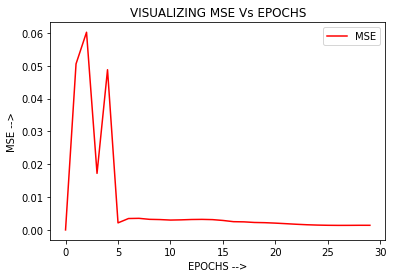

In [41]:
import matplotlib.pyplot as plt

plt.plot(MSE,label='MSE',color='red')

# Add labels and title
plt.title("VISUALIZING MSE Vs EPOCHS")
plt.xlabel("EPOCHS -->")
plt.ylabel("MSE -->")
 
plt.legend()
plt.show()